# Modelling - Naive Bayes

## Goal:

Using user names and descriptions, I will build a model to predict a person's political leanings, that being liberal or conservative.

### Contents:
- [1. Importing libraries](#1.-Importing-libraries)
- [2. Importing datasets](#2.-Importing-datasets)
- [3. Model hyperparameter tuning](#3.-Model-hyperparameter-tuning)
- [4. Building the model](#4.-Data-Cleaning)
- [5. Model validation and evaluation](#5.-Model-validation-and-evaluation)

## 1. Importing libraries

In [1]:
import pandas as pd
import pleiades as ple
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
pd.options.display.max_columns=110
pd.options.display.max_rows=300

## 2. Importing datasets

In [2]:
import_path = r'..\data\#michellewilliams_users_clean.csv'
df = pd.read_csv(import_path, index_col=0)

import_path = r'..\data\replies_to_jk_rowling_users_clean.csv'
df2 = pd.read_csv(import_path, index_col=0)

In [3]:
df.head()

,name_and_description,conservative
0,Boris Is My Prime Minister ✡ ️ 🇬🇧,1.0
1,🇺🇸 🇺🇸 Red Blooded All American 🌾 Heartland bo...,1.0
2,Indian singer Army brat Muay Thai panda Horse ...,0.0
3,Christian SC Gamecocks College Football Outdoo...,1.0
4,Mother of Amma to love my kids love my grandki...,1.0


In [4]:
df = df.fillna('')
df2 = df2.fillna('')

In [5]:
X = df['name_and_description']
X_val = df2['name_and_description']
y = df['conservative'].values
y_val = df2['conservative'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
sebas = ple.Sebastian()

## 3. Model hyperparameter tuning

In [8]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])
params = {
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__max_df': [.3, .6, .9],
    'tvec__min_df': [1, 3, 7],
    'tvec__max_features': [2000, 5000, 10000],
    'tvec__token_pattern': [r'([^\s]+)'],
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
# best score: 0.8203659506762132
print('best score:', gs.best_score_)
# best params: tvec: max_df=0.3, max_features=5000, min_df=3, ngram_range=(1, 2), stop_words='english', token_pattern='([^\s]+)'
print('best params:', sebas.get_params(gs.best_params_))
print()

best score: 0.8203659506762132
best params: tvec: max_df=0.3, max_features=5000, min_df=3, ngram_range=(1, 2), stop_words='english', token_pattern='([^\s]+)'



In [20]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('cnb', ComplementNB())
])
params = {
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__max_df': [.3, .6, .9],
    'tvec__min_df': [1, 3, 7],
    'tvec__max_features': [2000, 5000, 10000],
    'tvec__token_pattern': [r'([^\s]+)'],
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
# best score: 0.8155926809864757
print('best score:', gs.best_score_)
# best params: max_df=0.3, max_features=2000, min_df=3, ngram_range=(1, 2), stop_words='english', token_pattern='([^\s]+)'
print('best params:', sebas.get_params(gs.best_params_))
print()

best score: 0.8155926809864757
best params: tvec: max_df=0.3, max_features=2000, min_df=3, ngram_range=(1, 2), stop_words='english', token_pattern='([^\s]+)'



## 4. Building the model

In [7]:
tvec = TfidfVectorizer(max_df=0.3, max_features=5000, min_df=3, ngram_range=(1, 2), stop_words='english', token_pattern='([^\s]+)')
X_train = tvec.fit_transform(X_train)
X_train = pd.DataFrame(X_train.toarray(), columns=tvec.get_feature_names())
X_test = tvec.transform(X_test)
X_test = pd.DataFrame(X_test.toarray(), columns=tvec.get_feature_names())
X_val = tvec.transform(X_val)
X_val = pd.DataFrame(X_val.toarray(), columns=tvec.get_feature_names())

In [8]:
print('TfidfVectorizer:')
print(X_train.sum().sort_values(ascending=False)[:10])

TfidfVectorizer:
️               144.558212
🇺🇸              144.207228
maga             96.516385
love             94.345246
trump            92.623430
⭐                72.804956
life             69.109574
❤                59.036810
god              56.376676
conservative     52.962617
dtype: float64


In [9]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

## 5. Model validation and evaluation

### Multinomial naive bayes

In [10]:
y_pred = mnb.predict(X_test)
y_pred2 = mnb.predict(X_val)

In [11]:
sebas = ple.Sebastian()

#### Plot terms that predict a person is conservative

In [12]:
print('most_important_features:', sebas.get_features(X_train, mnb.coef_.ravel(), order='dsc'))
print()

most_important_features: {'🇺🇸': -4.572047669153703, 'maga': -4.864109608494188, '️': -5.026990434692555, 'trump': -5.102463422515935, '⭐': -5.162971946638792, 'conservative': -5.445695719995902, 'kag': -5.463655055491804, 'god': -5.488260151383922, '⭐ ️': -5.498762327234396, 'love': -5.531934708481535, '🇺🇸 🇺🇸': -5.749800686592461, 'christian': -5.762700640624842, 'pro': -5.7776270618607, 'life': -5.799953372663916, '️ ⭐': -5.908376343603075, 'patriot': -5.947466306627365, '❤': -5.956418609502892, 'america': -5.962874026261037, '2020': -5.967044942386419, 'wwg1wga': -5.969708608775985, 'maga kag': -5.978727662084893, 'country': -5.979481615135501, 'american': -5.982638290755993, 'trump 2020': -6.057585359852224, 'family': -6.073536235341056, 'jesus': -6.08706468272951, 'proud': -6.092634153271224, 'married': -6.1315444938444355, '❌': -6.137163717945066, 'president': -6.179957770893328, '2a': -6.184486555097058, '❤ ️': -6.21112864502506, 'pro life': -6.235296283918239, 'wife': -6.2951595

In [13]:
sebas.plot_importances()

<Figure size 640x480 with 1 Axes>

#### Run model on test and validation set

In [14]:
print(classification_report(y_test, y_pred, output_dict=False))

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      1169
         1.0       0.93      0.64      0.76       927

    accuracy                           0.82      2096
   macro avg       0.85      0.80      0.81      2096
weighted avg       0.84      0.82      0.81      2096



In [15]:
print(confusion_matrix(y_test, y_pred))

[[1121   48]
 [ 334  593]]


In [35]:
print(classification_report(y_val, y_pred2, output_dict=False))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       781
         1.0       0.68      0.30      0.41       166

    accuracy                           0.85       947
   macro avg       0.77      0.63      0.66       947
weighted avg       0.83      0.85      0.83       947



In [36]:
print(confusion_matrix(y_val, y_pred2))

[[758  23]
 [117  49]]


### Complement naive bayes

In [37]:
y_pred = cnb.predict(X_test)
y_pred2 = cnb.predict(X_val)

#### Plot terms that predict a person is conservative

In [45]:
print('most_important_features:', sebas.get_features(X_train, cnb.coef_.ravel(), order='dsc'))
print()

most_important_features: {'cult 45': 9.513345052819483, '100 president': 9.513345052819481, '1776': 9.513345052819481, '1a': 9.513345052819481, '1a 2a': 9.513345052819481, '200': 9.513345052819481, '2012': 9.513345052819481, '2020 drain': 9.513345052819481, '2020 kag': 9.513345052819481, '2020 landslide': 9.513345052819481, '2020 maga': 9.513345052819481, '2020 pro': 9.513345052819481, '2020 support': 9.513345052819481, '2020 trump': 9.513345052819481, '26 years': 9.513345052819481, '2a': 9.513345052819481, '2a 1a': 9.513345052819481, '2a america': 9.513345052819481, '2a build': 9.513345052819481, '2a constitution': 9.513345052819481, '2a maga': 9.513345052819481, '2a molon': 9.513345052819481, '2a nra': 9.513345052819481, '2a pro': 9.513345052819481, '2a support': 9.513345052819481, '2a supporter': 9.513345052819481, '2a wwg1wga': 9.513345052819481, '2a 🇺🇸': 9.513345052819481, '2a 🔫': 9.513345052819481, '2nd amendment': 9.513345052819481, '38': 9.513345052819481, '39': 9.5133450528194

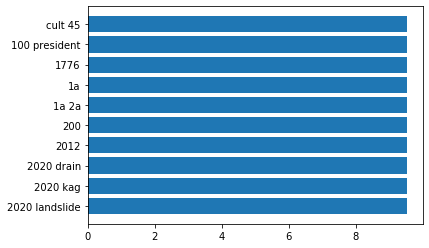

In [46]:
sebas.plot_importances(order='dsc')

These are the terms that complementary naive bayes calculates as being least likely to appear on a non-conservative twitter user.

#### Run model on test and validation set

In [47]:
print(classification_report(y_test, y_pred, output_dict=False))

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      1169
         1.0       0.89      0.67      0.77       927

    accuracy                           0.82      2096
   macro avg       0.83      0.80      0.81      2096
weighted avg       0.83      0.82      0.81      2096



In [48]:
print(confusion_matrix(y_test, y_pred))

[[1088   81]
 [ 302  625]]


In [49]:
print(classification_report(y_val, y_pred2, output_dict=False))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       781
         1.0       0.55      0.36      0.43       166

    accuracy                           0.84       947
   macro avg       0.71      0.65      0.67       947
weighted avg       0.82      0.84      0.82       947



In [50]:
print(confusion_matrix(y_val, y_pred2))

[[731  50]
 [106  60]]


### Conclusion

- The model proved to be reasonably accurate in predicting the political leanings of a person, with an accuracy of 82% on the test dataset and 84-85% on the validation dataset. This shows that the model is not overfitted.
- The precision of the model when predicting conservative users is much lower than its overall accuracy, at 68% for multinomial naive bayes and 55% for complementary naive bayes.
- Many of the terms that the model used to predict a person's political leanings are dependent on the current political climate in the United States, which are likely to change every 4 years.
- It also needs to be kept in mind that the model was trained on an English speaking, mostly American subset of the twitter population. While it appears to be reasonably accurate on English twitter on European topics, it may not be as accurate in less westernized English speaking countries like Singapore.